In [35]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import svm
import matplotlib.pyplot as plt

In [36]:
### Load and parse data

# White wine
white_wine_data = pd.read_csv("winequality-white.csv")

print("Statistics of White Wine Data")
print(white_wine_data.describe().T)


data_headers = list(white_wine_data.columns)
white_wine_input = np.array(white_wine_data.loc[:, data_headers[0:11]])
white_wine_output = np.array(white_wine_data.loc[:, data_headers[11]])

print("White Wine Input")
print(white_wine_input)
print("White Wine Output")
print(white_wine_output)


# Red Wine
red_wine_data = pd.read_csv("winequality-red.csv")

print("\nStatistics of Red Wine Data")
print(red_wine_data.describe().T)


data_headers = list(red_wine_data.columns)
red_wine_input = np.array(red_wine_data.loc[:, data_headers[0:11]])
red_wine_output = np.array(red_wine_data.loc[:, data_headers[11]])

print("Red Wine Input")
print(red_wine_input)
print("Red Wine Output")
print(red_wine_output)



Statistics of White Wine Data
                       count        mean        std      min         25%  \
fixed acidity         4898.0    6.854788   0.843868  3.80000    6.300000   
volatile acidity      4898.0    0.278241   0.100795  0.08000    0.210000   
citric acid           4898.0    0.334192   0.121020  0.00000    0.270000   
residual sugar        4898.0    6.391415   5.072058  0.60000    1.700000   
chlorides             4898.0    0.045772   0.021848  0.00900    0.036000   
free sulfur dioxide   4898.0   35.308085  17.007137  2.00000   23.000000   
total sulfur dioxide  4898.0  138.360657  42.498065  9.00000  108.000000   
density               4898.0    0.994027   0.002991  0.98711    0.991723   
pH                    4898.0    3.188267   0.151001  2.72000    3.090000   
sulphates             4898.0    0.489847   0.114126  0.22000    0.410000   
alcohol               4898.0   10.514267   1.230621  8.00000    9.500000   
quality               4898.0    5.877909   0.885639  3.000

In [37]:
### Preprocessing (White Wine)
# Note: if this cell is run twice in a row PCA and normalization will be applied twice

# PCA
pca_w = PCA(n_components=11)
white_wine_input = pca_w.fit_transform(white_wine_input)
# print(pca_w.explained_variance_ratio_)

# normalization
normalizer = MinMaxScaler()
white_wine_input = normalizer.fit_transform(white_wine_input)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(white_wine_input, white_wine_output, test_size=0.3, random_state=42)

# Holdout
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [38]:
###  Regression Task

# Logistic Regression
logistic = linear_model.LogisticRegression(max_iter=200)
logistic.fit(X_train, y_train)

# Preformance Evaluation
y_train_pred = logistic.predict(X_train)
y_val_pred = logistic.predict(X_val)
y_test_pred = logistic.predict(X_test)

y_train_per = metrics.mean_squared_error(y_train, y_train_pred)
y_val_per = metrics.mean_squared_error(y_val, y_val_pred)
y_test_per = metrics.mean_squared_error(y_test, y_test_pred)

print("logistic regressor performance (Mean Squared Error)")
print("Training: ", y_train_per)
print("Validation: ", y_val_per)
print("Test: ", y_test_per)




logistic regressor performance (Mean Squared Error)
Training:  0.6611962071480671
Validation:  0.6836734693877551
Test:  0.672108843537415


In [39]:
# Support Vector Machines
svm_reg = svm.SVR(kernel="rbf")
svm_reg.fit(X_train, y_train)

# Preformance Evaluation
y_train_pred = svm_reg.predict(X_train)
y_val_pred = svm_reg.predict(X_val)
y_test_pred = svm_reg.predict(X_test)

y_train_per = metrics.mean_squared_error(y_train, y_train_pred)
y_val_per = metrics.mean_squared_error(y_val, y_val_pred)
y_test_per = metrics.mean_squared_error(y_test, y_test_pred)

print("SVM regressor performance (Mean Squared Error)")
print("Training: ", y_train_per)
print("Validation: ", y_val_per)
print("Test: ", y_test_per)

SVM regressor performance (Mean Squared Error)
Training:  0.43634818381146706
Validation:  0.5104854422192404
Test:  0.4890406899190734


In [40]:
# Neural Networks
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(solver='sgd', alpha=0.001, hidden_layer_sizes=(100, 100), max_iter = 5000, learning_rate='adaptive', learning_rate_init=0.01, tol=1e-5,
                    activation="logistic", verbose=True)


mlp.fit(X_train, y_train)

# Preformance Evaluation
y_train_pred = mlp.predict(X_train)
y_val_pred = mlp.predict(X_val)
y_test_pred = mlp.predict(X_test)

y_train_per = metrics.mean_squared_error(y_train, y_train_pred)
y_val_per = metrics.mean_squared_error(y_val, y_val_pred)
y_test_per = metrics.mean_squared_error(y_test, y_test_pred)

print("SVM regressor performance (Mean Squared Error)")
print("Training: ", y_train_per)
print("Validation: ", y_val_per)
print("Test: ", y_test_per)


Iteration 1, loss = 2.18140460
Iteration 2, loss = 0.40171538
Iteration 3, loss = 0.39896934
Iteration 4, loss = 0.39890251
Iteration 5, loss = 0.39932921
Iteration 6, loss = 0.39874163
Iteration 7, loss = 0.39879220
Iteration 8, loss = 0.40050779
Iteration 9, loss = 0.39882440
Iteration 10, loss = 0.39907256
Iteration 11, loss = 0.39931608
Iteration 12, loss = 0.39941865
Iteration 13, loss = 0.39817665
Iteration 14, loss = 0.39881603
Iteration 15, loss = 0.39855490
Iteration 16, loss = 0.40012370
Iteration 17, loss = 0.39891213
Iteration 18, loss = 0.39885284
Iteration 19, loss = 0.39863579
Iteration 20, loss = 0.39849173
Iteration 21, loss = 0.39851278
Iteration 22, loss = 0.40040568
Iteration 23, loss = 0.39940467
Iteration 24, loss = 0.39791163
Iteration 25, loss = 0.39817211
Iteration 26, loss = 0.40070871
Iteration 27, loss = 0.39843561
Iteration 28, loss = 0.39958707
Iteration 29, loss = 0.39926750
Iteration 30, loss = 0.39820361
Iteration 31, loss = 0.39799096
Iteration 32, los

SVM regressor performance - Accuracy
Training:  0.5835156819839533
Validation:  0.5364431486880467
Test:  0.5564625850340136
Test Confusion


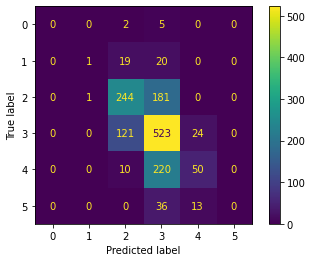

Training Confusion


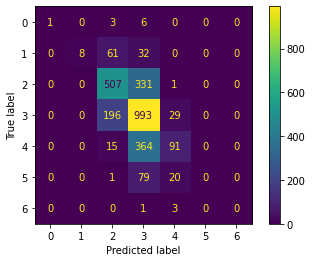

In [41]:
###  Classification Task

# Support Vector Machines
svm_cl = svm.SVC(kernel="rbf")
svm_cl.fit(X_train, y_train)

# Preformance Evaluation
y_train_pred = svm_cl.predict(X_train)
y_val_pred = svm_cl.predict(X_val)
y_test_pred = svm_cl.predict(X_test)

y_train_per = metrics.accuracy_score(y_train, y_train_pred)
y_val_per = metrics.accuracy_score(y_val, y_val_pred)
y_test_per = metrics.accuracy_score(y_test, y_test_pred)

print("SVM regressor performance - Accuracy")
print("Training: ", y_train_per)
print("Validation: ", y_val_per)
print("Test: ", y_test_per)

# confusion matrix on test set
print("Test Confusion")
conf_mat = metrics.confusion_matrix(y_test, y_test_pred)
disp = metrics.ConfusionMatrixDisplay(conf_mat)
disp.plot()
plt.show()

# confusion matrix on training set
print("Training Confusion")
conf_mat = metrics.confusion_matrix(y_train, y_train_pred)
disp = metrics.ConfusionMatrixDisplay(conf_mat)
disp.plot()
plt.show()